# Segmenting and Clustering Neighborhoods in Toronto

## Part 1
* Getting Toronto neighborhoods data into a dataframe.
* [Link to data source](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
import requests
import folium
import plotly.express as px

In [ ]:
# Reading List of postal codes of Canada: M from wikipedia using pandas
toronto_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
raw_data = pd.read_html(toronto_url)[0]
raw_data.head(3)

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...


In [ ]:
raw_data.size

180

In [ ]:
# Create a function to extract data into a proper dataframe (df).
def extract_toronto(df, col_name):
    
    df2 = pd.DataFrame(columns = col_name)
    
    for row in range(df.shape[0]):
        
        for col in range(df.shape[1]):
            
            postal_code = df.loc[row,col][:3]
            borough = df.loc[row,col][3:df.loc[row,col].find(r'(')]
            neighborhood = df.loc[row,col][df.loc[row,col].find(r'('):]
            
            neighborhood = neighborhood.replace(r'/',',')
            neighborhood = neighborhood[1:-1]
            
            df2 = df2.append(pd.DataFrame([[postal_code, borough, neighborhood]], columns = col_name))
            
            df2.reset_index(drop = True, inplace = True)
            
    return df2

In [ ]:
# extract data, put it in dataframe and assign to df.
df = extract_toronto(raw_data, ['PostalCode','Borough','Neighborhood'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PostalCode    180 non-null    object
 1   Borough       180 non-null    object
 2   Neighborhood  180 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


In [ ]:
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigne,
1,M2A,Not assigne,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"


In [ ]:
# filter out Borough == 'Not assigne'.
df = df[df['Borough'] != 'Not assigne']
df.reset_index(drop = True, inplace = True)
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [ ]:
# check 'Not assigne' in Neighborhood column.
df[df['Neighborhood'] == 'Not assigne']

,PostalCode,Borough,Neighborhood


In [ ]:
# return shape of a dataframe
df.shape

(103, 3)

## Part 2
* Getting latitude and longitude for each postal code of Toronto.
* Update the dataframe with latitude and longitude columns.

In [ ]:
# getting latitude and longitude using geolocator
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="toronto_explorer")

for i in df['PostalCode']:
    try:
        location = geolocator.geocode(i+", Toronto" + ", Canada")
        latitude = location.latitude
        longitude = location.longitude   
        print('{}: {}, {}'.format(i, latitude, longitude))
    
    except:
        print(i+": None")
        
print('Finish')

M3A: 43.65238435, -79.38356765
M4A: None
M5A: None
M6A: None
M7A: 43.65238435, -79.38356765
M9A: None
M1B: 43.65238435, -79.38356765
M3B: None
M4B: None
M5B: None
M6B: None
M9B: None
M1C: 43.65238435, -79.38356765
M3C: None
M4C: None
M5C: None
M6C: None
M9C: 43.64410993066079, -79.58890692194828
M1E: None
M4E: None
M5E: 43.6421064, -79.3774455
M6E: None
M1G: 43.76571676956549, -79.22189842824983
M4G: None
M5G: None
M6G: None
M1H: None
M2H: None
M3H: None
M4H: None
M5H: 43.649900711937015, -79.38371829639617
M6H: None
M1J: None
M2J: 43.7797719, -79.3661846
M3J: None
M4J: None
M5J: 43.63925859999999, -79.38283994999999
M6J: None
M1K: None
M2K: None
M3K: None
M4K: None
M5K: None
M6K: 43.63709690913502, -79.4349584391061
M1L: None
M2L: None
M3L: None
M4L: None
M5L: None
M6L: None
M9L: None
M1M: None
M2M: 43.7859621, -79.4160307769213
M3M: None
M4M: None
M5M: None
M6M: None
M9M: None
M1N: None
M2N: 43.7792385670669, -79.41659335433374
M3N: None
M4N: None
M5N: None
M6N: 43.67455344769015, -7

In [ ]:
# read coordinates from a provided csv file and assign to df_c 
df_c = pd.read_csv("Geospatial_Coordinates.csv")
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Postal Code  103 non-null    object 
 1   Latitude     103 non-null    float64
 2   Longitude    103 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [ ]:
df_c.head(3)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711


In [ ]:
# left join df and df_c
df = df.merge(df_c, 'left', left_on = 'PostalCode', right_on = 'Postal Code')

In [ ]:
# Check null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PostalCode    103 non-null    object 
 1   Borough       103 non-null    object 
 2   Neighborhood  103 non-null    object 
 3   Postal Code   103 non-null    object 
 4   Latitude      103 non-null    float64
 5   Longitude     103 non-null    float64
dtypes: float64(2), object(4)
memory usage: 5.6+ KB


In [ ]:
df.head(3)

,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",M5A,43.654260,-79.360636


In [ ]:
# drop Postal Code column.
df.drop('Postal Code', axis = 1, inplace = True)
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


## Part 3
* Explore and cluster the neighborhoods in Toronto.
* Focus on Borough like ... Toronto.

In [ ]:
# Get a latitude and longitude of Toronto using geopy.Nominatim.
address = 'Toronto, ON'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [ ]:
# create map of Toronto using latitude and longitude values.
map_tor = folium.Map(location=[latitude, longitude], zoom_start=10) # create main map of Toronto

# add markers (neighborhoods) to the map using df['Latitude'], df['Longitude']
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#03a9f4',  #3186cc
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  
    
map_tor

In [ ]:
print(f"Number of unique borough: {df['Borough'].nunique()}\nNumber of unique neighborhood: {df['Neighborhood'].nunique()}")

Number of unique borough: 15
Number of unique neighborhood: 103


In [ ]:
print("Boroughs that have the word 'Toronto'")
bt = [i for i in df['Borough'].unique() if i.endswith('Toronto')]
print(bt)

Boroughs that have the word 'Toronto'
['Downtown Toronto', 'East Toronto', 'West Toronto', 'East YorkEast Toronto', 'Central Toronto']


In [ ]:
# filter borough column according to bt.
df_bt = df.loc[(df['Borough'] == bt[0]) | (df['Borough'] == bt[1])| (df['Borough'] == bt[2])| (df['Borough'] == bt[3])| (df['Borough'] == bt[4])].copy()
df_bt.reset_index(drop = True, inplace = True)
df_bt

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568
8,M6H,West Toronto,"Dufferin , Dovercourt Village",43.669005,-79.442259
9,M4J,East YorkEast Toronto,The Danforth East,43.685347,-79.338106


In [ ]:
print(f"Number of unique borough: {df_bt['Borough'].nunique()}\nNumber of unique neighborhood: {df_bt['Neighborhood'].nunique()}")

Number of unique borough: 5
Number of unique neighborhood: 37


***Now let's create a map with df_bt.***

In [ ]:
# create map of Toronto using latitude and longitude values.
map_tor = folium.Map(location=[latitude, longitude], zoom_start=10) # create main map of Toronto

# add markers (neighborhoods) to the map using df_bt['Latitude'], df_bt['Longitude']
for lat, lng, borough, neighborhood in zip(df_bt['Latitude'], df_bt['Longitude'], df_bt['Borough'], df_bt['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#65fe08', 
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  

# add a toronto marker
folium.CircleMarker([latitude, longitude], radius=10, popup='Toronto',color='red',fill=True,fill_color='#ff6c70', fill_opacity=0.7,parse_html=False).add_to(map_tor)

map_tor

***Downloading data using FourSquare API***

In [ ]:
CLIENT_ID = 'EXFDEGF3DSHXC4PN4WBMI3A0KLJYKX2XDI3EHXN14UMRS4M1' # your Foursquare ID
CLIENT_SECRET = 'EW40HKHOPRRYK5D4COF0SMJ2YAAP50XLY4PFBRUZ2BL0J3V2' # your Foursquare Secret
VERSION = '20210401' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EXFDEGF3DSHXC4PN4WBMI3A0KLJYKX2XDI3EHXN14UMRS4M1
CLIENT_SECRET:EW40HKHOPRRYK5D4COF0SMJ2YAAP50XLY4PFBRUZ2BL0J3V2


In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
# function that download popular spots for each neighborhood utilizing FourSquare api.
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [ ]:
toronto_data = getNearbyVenues(df_bt['Neighborhood'],df_bt['Latitude'],df_bt['Longitude'])

Regent Park , Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond , Adelaide , King
Dufferin , Dovercourt Village
The Danforth East
Harbourfront East , Union Station , Toronto Islands
Little Portugal , Trinity
The Danforth West , Riverdale
Toronto Dominion Centre , Design Exchange
Brockton , Parkdale Village , Exhibition Place
India Bazaar , The Beaches West
Commerce Court , Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park , The Junction South
North Toronto West
The Annex , North Midtown , Yorkville
Parkdale , Roncesvalles
Davisville
University of Toronto , Harbord
Runnymede , Swansea
Moore Park , Summerhill East
Kensington Market , Chinatown , Grange Park
Summerhill West , Rathnelly , South Hill , Forest Hill SE , Deer Park
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport
Rosedale
St. James Town , Cabbage

In [ ]:
# toronto_data.to_csv("toronto_related_borough.csv", index = False)

In [ ]:
toronto_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park , Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park , Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park , Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park , Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park , Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park


In [ ]:
# Check the shape of toronto_data.
toronto_data.shape

(1465, 7)

In [ ]:
# assign toronto_data to toronto_venues, it just sound a little better to me.
toronto_venues = toronto_data

In [ ]:
# check unique venue category.
toronto_venues['Venue Category'].nunique()

227

In [ ]:
# check neighborhoods that have high venue category.
toronto_venues.groupby("Neighborhood").count().sort_values(by = "Venue Category", ascending = False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Garden District, Ryerson",100,100,100,100,100,100
"Toronto Dominion Centre , Design Exchange",100,100,100,100,100,100
"Commerce Court , Victoria Hotel",100,100,100,100,100,100
"First Canadian Place , Underground city",100,100,100,100,100,100
"Harbourfront East , Union Station , Toronto Islands",100,100,100,100,100,100
"Richmond , Adelaide , King",93,93,93,93,93,93
St. James Town,82,82,82,82,82,82
Church and Wellesley,73,73,73,73,73,73
Central Bay Street,66,66,66,66,66,66


In [ ]:
# venues = pd.read_csv("toronto_related_borough.csv")
venues = toronto_venues

In [ ]:
# There is a Neighborhood category in Venue Category.
# So I will rename the original Neighborhood to neighborhood to prevent a duplicate column name after create dummies.
venues.rename(columns = {'Neighborhood':'neighborhood'}, inplace= True)
venues

,neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park , Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park , Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park , Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park , Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park , Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
...,...,...,...,...,...,...,...
1460,Church and Wellesley,43.66586,-79.383160,Asahi Sushi,43.669874,-79.382943,Sushi Restaurant
1461,Church and Wellesley,43.66586,-79.383160,Town Inn Suites,43.669056,-79.382573,Hotel
1462,Church and Wellesley,43.66586,-79.383160,Croissant Tree,43.669575,-79.382331,Coffee Shop
1463,Church and Wellesley,43.66586,-79.383160,McDonald's,43.668854,-79.385962,Fast Food Restaurant


***Prepare dataset for KMeans***

In [ ]:
# Transform Venue Category into dummy variables using pd.get_dummies()
toronto_cluster = pd.concat([venues['neighborhood'], pd.get_dummies(venues['Venue Category'])], axis = 1)
toronto_cluster

,neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1462,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1463,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Grouping by neighborhood 
toronto_cluster = toronto_cluster.groupby("neighborhood").mean().reset_index()

In [ ]:
toronto_cluster

,neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.00,0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton , Parkdale Village , Exhibition Place",0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
2,"CN Tower , King and Spadina , Railway Lands , ...",0.0625,0.0625,0.0625,0.125,0.125,0.0625,0.000000,0.000000,0.00,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Central Bay Street,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.00,0.015152,0.000000,0.000000,0.015152,0.000000,0.000000,0.015152
4,Christie,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.013699,0.000000,0.00,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.027397
6,"Commerce Court , Victoria Hotel",0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.030000,0.000000,0.00,...,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
7,Davisville,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.00,...,0.029412,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Davisville North,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Dufferin , Dovercourt Village",0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


***Fitting KMeans***

In [ ]:
# Finding optimum K for KMeans using elbow method (fitting multiple KMeans models with different K).
K = list(range(2,10))
inertias = []
for i in range(2,10):
    km = KMeans(i, init = 'k-means++', n_init= 20, random_state = 101)
    km.fit(toronto_cluster.drop('neighborhood',axis = 1))
    inertias.append(km.inertia_)

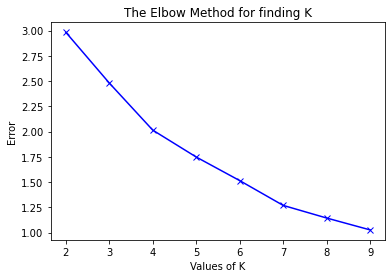

In [ ]:
# Plot elbow graph of KMeans models with different K and their errors.
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.title('The Elbow Method for finding K')
plt.show()

In [ ]:
# Choose K = 4
# Fit model
km = KMeans(4, init = 'k-means++', n_init= 20, random_state = 101)
km.fit(toronto_cluster.drop('neighborhood',axis = 1))

toronto_cluster['cluster'] = km.labels_

In [ ]:
df.columns

Index(['PostalCode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')

In [ ]:
toronto_result = toronto_cluster.merge(df[['Neighborhood','Latitude','Longitude']], how = 'left', left_on = 'neighborhood', right_on = 'Neighborhood')

In [ ]:
# Check null values.
toronto_result.isnull().sum(axis = 0).sort_values(ascending = False)

Longitude                     0
Distribution Center           0
Fast Food Restaurant          0
Farmers Market                0
Falafel Restaurant            0
                             ..
Modern European Restaurant    0
Miscellaneous Shop            0
Middle Eastern Restaurant     0
Mexican Restaurant            0
neighborhood                  0
Length: 232, dtype: int64

In [ ]:
# drop duplicate neighborhood column.
toronto_result.drop('Neighborhood_y', axis =1, inplace = True)

In [ ]:
toronto_result.head()

,neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio,cluster,Latitude,Longitude
0,Berczy Park,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,...,0.016949,0.0,0.0,0.000000,0.0,0.0,0.000000,1,43.644771,-79.373306
1,"Brockton , Parkdale Village , Exhibition Place",0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.040000,1,43.636847,-79.428191
2,"CN Tower , King and Spadina , Railway Lands , ...",0.0625,0.0625,0.0625,0.125,0.125,0.0625,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1,43.628947,-79.394420
3,Central Bay Street,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,...,0.015152,0.0,0.0,0.015152,0.0,0.0,0.015152,1,43.657952,-79.387383
4,Christie,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1,43.669542,-79.422564


In [ ]:
toronto_result.shape

(37, 231)

In [ ]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
kclusters = 4
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_result['Latitude'], toronto_result['Longitude'], toronto_result['neighborhood'], toronto_result['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

***Result***

In [ ]:
# Drop columns 'neighborhood','Latitude','Longitude' from toronto_result.
toronto_result2 = toronto_result.drop(['neighborhood','Latitude','Longitude'], axis = 1)

In [ ]:
toronto_result2.head()

,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio,cluster
0,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,0.016949,...,0.0,0.0,0.016949,0.0,0.0,0.000000,0.0,0.0,0.000000,1
1,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.040000,1
2,0.0625,0.0625,0.0625,0.125,0.125,0.0625,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1
3,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.015152,0.0,0.0,0.015152,0.0,0.0,0.015152,1
4,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1


In [ ]:
# This table is not helping...

In [ ]:
# Try grouping by clusters.
toronto_result2 = toronto_result2.groupby('cluster').mean()

In [ ]:
toronto_result2.reset_index(inplace = True)

In [ ]:
toronto_result2

,cluster,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.002016,0.002016,0.002016,0.004032,0.004032,0.002016,0.008972,0.002094,0.001613,...,0.002647,0.000768,0.000968,0.007265,0.001271,0.005582,0.003724,0.000442,0.000496,0.010303
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='cluster', ylabel='Vegetarian / Vegan Restaurant'>

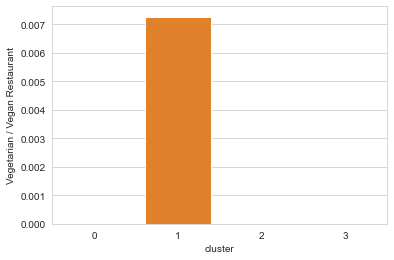

In [ ]:
sns.set_style('whitegrid')
sns.barplot(x= 'cluster', y = 'Vegetarian / Vegan Restaurant', data= toronto_result2)

In [ ]:
# Hard to interpret, Let's transpose the result table.

In [ ]:
toronto_result3 = toronto_result2.set_index('cluster').T.copy()
toronto_result3

cluster,0,1,2,3
Airport,0.0,0.002016,0.0,0.0
Airport Food Court,0.0,0.002016,0.0,0.0
Airport Gate,0.0,0.002016,0.0,0.0
Airport Lounge,0.0,0.004032,0.0,0.0
Airport Service,0.0,0.004032,0.0,0.0
...,...,...,...,...
Vietnamese Restaurant,0.0,0.005582,0.0,0.0
Wine Bar,0.0,0.003724,0.0,0.0
Wings Joint,0.0,0.000442,0.0,0.0
Women's Store,0.0,0.000496,0.0,0.0


Text(0.5, 1.0, 'Number of neighborhood per cluster')

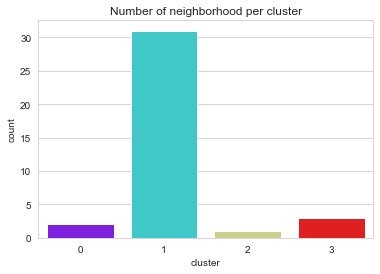

In [ ]:
sns.countplot(x = 'cluster',data = toronto_result, palette= rainbow)
plt.title('Number of neighborhood per cluster')

**Cluster 1 has the highest number of neignborhood which is 31**<br>
**While cluster 0, 2, 3 has 2, 1, 3 neighborhoods in order.**

***Cluster 0 Result***

<AxesSubplot:title={'center':'Top 10 venues of cluster 0'}>

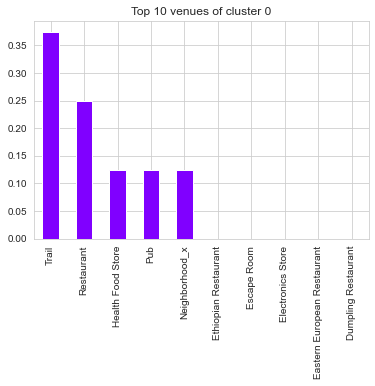

In [ ]:
toronto_result3[0].sort_values(ascending = False)[:10].plot(kind = 'bar', title = 'Top 10 venues of cluster 0', color = rainbow[0])

**Cluster 0's popular venues are Trail, Restaurant, Health Food Store, Pub.**

In [ ]:
# The neighborhoods that have many Restaurant.
toronto_result[toronto_result['cluster'] == 0].sort_values(by ='Restaurant', ascending = False)[['cluster','neighborhood','Restaurant']]

,cluster,neighborhood,Restaurant
19,0,"Moore Park , Summerhill East",0.5
32,0,The Beaches,0.0


In [ ]:
# cluster 0's neighborhoods for each popular spot.
toronto_result[toronto_result['cluster'] == 0][['cluster','neighborhood','Restaurant','Trail','Health Food Store','Pub']]

,cluster,neighborhood,Restaurant,Trail,Health Food Store,Pub
19,0,"Moore Park , Summerhill East",0.5,0.50,0.00,0.00
32,0,The Beaches,0.0,0.25,0.25,0.25


***Cluster 1 result***

<AxesSubplot:title={'center':'Top 10 venues of cluster 1'}>

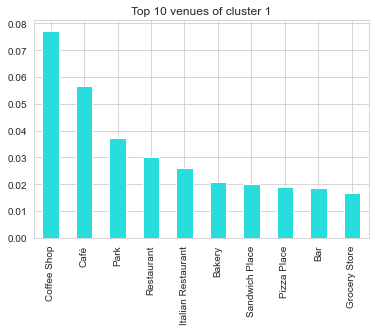

In [ ]:
toronto_result3[1].sort_values(ascending = False)[:10].plot(kind = 'bar', title = 'Top 10 venues of cluster 1', color = rainbow[1])

**Cluster 1's popular venues are Coffee Shop, Cafe, Park, Restaurant, Italian Restaurant, Bakery, Sandwich Place, Bar, Grocery Store.**

In [ ]:
# cluster 1's neighborhoods for each popular spot.
popular_1 = toronto_result3[1].sort_values(ascending = False)[:10].index.to_list()
toronto_result[toronto_result['cluster'] == 1][['cluster','neighborhood']+popular_1]

,cluster,neighborhood,Coffee Shop,Café,Park,Restaurant,Italian Restaurant,Bakery,Sandwich Place,Pizza Place,Bar,Grocery Store
0,1,Berczy Park,0.084746,0.016949,0.016949,0.033898,0.000000,0.033898,0.016949,0.000000,0.000000,0.016949
1,1,"Brockton , Parkdale Village , Exhibition Place",0.080000,0.120000,0.000000,0.040000,0.040000,0.040000,0.000000,0.000000,0.040000,0.040000
2,1,"CN Tower , King and Spadina , Railway Lands , ...",0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000
3,1,Central Bay Street,0.166667,0.045455,0.015152,0.015152,0.045455,0.000000,0.060606,0.015152,0.000000,0.000000
4,1,Christie,0.062500,0.187500,0.125000,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.250000
5,1,Church and Wellesley,0.068493,0.013699,0.013699,0.041096,0.013699,0.000000,0.000000,0.013699,0.000000,0.013699
6,1,"Commerce Court , Victoria Hotel",0.130000,0.060000,0.010000,0.070000,0.040000,0.010000,0.010000,0.010000,0.000000,0.000000
7,1,Davisville,0.058824,0.058824,0.029412,0.029412,0.058824,0.000000,0.088235,0.088235,0.000000,0.000000
8,1,Davisville North,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000
9,1,"Dufferin , Dovercourt Village",0.000000,0.071429,0.071429,0.000000,0.000000,0.142857,0.000000,0.000000,0.071429,0.071429


In [ ]:
# For example, if u want to open an Italian Restaurant, you might consider The Danforth West , Riverdale because there are already many.	
toronto_result[toronto_result['cluster'] == 1][['cluster','neighborhood']+popular_1][['cluster','neighborhood','Italian Restaurant']].sort_values(by = 'Italian Restaurant', ascending = False)

,cluster,neighborhood,Italian Restaurant
34,1,"The Danforth West , Riverdale",0.071429
21,1,"Parkdale , Roncesvalles",0.066667
4,1,Christie,0.062500
36,1,"University of Toronto , Harbord",0.058824
7,1,Davisville,0.058824
26,1,"Runnymede , Swansea",0.057143
15,1,"India Bazaar , The Beaches West",0.047619
3,1,Central Bay Street,0.045455
28,1,"St. James Town , Cabbagetown",0.044444
14,1,"High Park , The Junction South",0.041667


***Cluster 2 result***

<AxesSubplot:title={'center':'Top 10 venues of cluster 2'}>

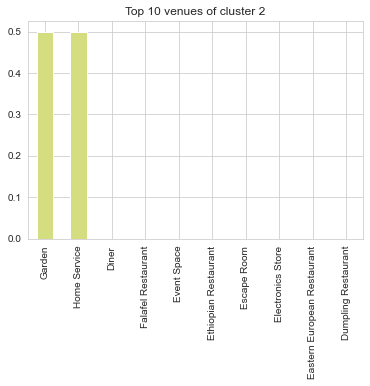

In [ ]:
toronto_result3[2].sort_values(ascending = False)[:10].plot(kind = 'bar', title = 'Top 10 venues of cluster 2', color=rainbow[2])

In [ ]:
toronto_result[toronto_result['cluster'] == 2][['cluster','neighborhood']+['Garden','Home Service']]

,cluster,neighborhood,Garden,Home Service
25,2,Roselawn,0.5,0.5


***Cluster 3 result***

<AxesSubplot:title={'center':'Top 10 venues of cluster 3'}>

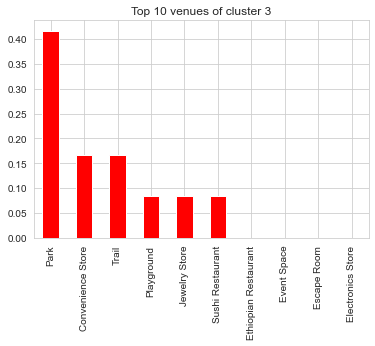

In [ ]:
toronto_result3[3].sort_values(ascending = False)[:10].plot(kind = 'bar', title = 'Top 10 venues of cluster 3', color=rainbow[3])

In [ ]:
popular_3 = toronto_result3[3].sort_values(ascending = False)[:6].index.to_list()
toronto_result[toronto_result['cluster'] == 3][['cluster','neighborhood']+popular_3]

,cluster,neighborhood,Park,Convenience Store,Trail,Playground,Jewelry Store,Sushi Restaurant
11,3,Forest Hill North & West,0.25,0.0,0.25,0.00,0.25,0.25
24,3,Rosedale,0.50,0.0,0.25,0.25,0.00,0.00
33,3,The Danforth East,0.50,0.5,0.00,0.00,0.00,0.00


### End